In [45]:
#
# # Ensure we have the needed libraries installed
# 
%pip install --quiet requests
%pip install --quiet beautifulsoup4
%pip install --quiet nbformat

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Rob.Harrison\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Rob.Harrison\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Rob.Harrison\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [46]:
#
# # Access the ETL function 'library'
# 
%run ETL_func_defs.ipynb

****************************** ETL functions def file version v0.0.1 ******************************



In [47]:
#
# Core user-defined variables
#

urlBase = "https://www.o2.co.uk/shop/phones"
urlSub = "#sort=content.sorting.featured&page="

main_content_selector = ".device-info-content"
brand_selector = '[data-qa-device-title] [data-qa-device-brand]'
model_family_selector = '[data-qa-device-title] [data-qa-device-modelfamily]'
star_rating_selector = ".star-rating__stars"
rating_value_selector = ".device-rating__text [itemprop='ratingValue']"
num_pages = 3


In [48]:
#
# # Extract the page data
#

phone_details_list = extract_phone_details(
    urlBase+urlSub,
    main_content_selector,
    brand_selector,
    model_family_selector,
    star_rating_selector,
    rating_value_selector,
    num_pages
)



# Visual checks/ref
# Print the extracted phone data details
x = 5  # Just to keep the output cleaner in notebook
for phone_details in itertools.islice(phone_details_list, x):
    print(phone_details)

{'Brand': 'Samsung', 'Model Family': 'Galaxy S23 Ultra', 'Star Rating': None, 'Rating Value': '4.2941'}
{'Brand': 'Samsung', 'Model Family': 'Galaxy S23', 'Star Rating': None, 'Rating Value': '5'}
{'Brand': 'Samsung', 'Model Family': 'Galaxy S23 Plus', 'Star Rating': None, 'Rating Value': '5'}
{'Brand': 'Apple', 'Model Family': 'iPhone 14', 'Star Rating': None, 'Rating Value': '4.3472'}
{'Brand': 'Apple', 'Model Family': 'iPhone 14 Pro', 'Star Rating': None, 'Rating Value': '4.5901'}
{'Brand': 'OPPO', 'Model Family': 'Find N2 Flip', 'Star Rating': None, 'Rating Value': '5'}
{'Brand': 'Google', 'Model Family': 'Pixel 7 Pro', 'Star Rating': None, 'Rating Value': '4.7629'}
{'Brand': 'Samsung', 'Model Family': 'Galaxy Z Fold4', 'Star Rating': None, 'Rating Value': '4.4524'}
{'Brand': 'Apple', 'Model Family': 'iPhone 14 Pro Max', 'Star Rating': None, 'Rating Value': '4.6012'}
{'Brand': 'Apple', 'Model Family': 'iPhone 14 Plus', 'Star Rating': None, 'Rating Value': '4.5846'}
{'Brand': 'Googl

In [55]:
#
# # (1)Pipeline reporting - Identify outliers
#

# set of chars we don't expect/want to see in data coming through pipeline
unwanted_chars = ['%', '?', '%', '$', "'", '#', ';', ',','-']
max_rating_value=5
max_model_family_length=21

outlier_phone_details = identify_outliers(phone_details_list, max_rating_value, max_model_family_length,special_chars=unwanted_chars)

# output shown later

In [50]:
#
# # (2)Pipeline reporting - Monitor/optimise process
#
import timeit # specific to this, so not in function defs

# measure the scrape/func execution time
times = timeit.repeat(time_extract_phone_details, number=1, repeat=10)

# calculate the avg time taken
avg_time = sum(times) / len(times)
print(f"Average execution time: {avg_time:.4f} seconds")

Average execution time: 3.4345 seconds


In [51]:
#
# # (1)Represent extracted data in flat file for onward/persistent ref.
#

save_data_to_file('phone_details', phone_details_list)
save_data_to_file('outlier_phone_details', outlier_phone_details)

Exporting data to file on path : ./phone_detailscsv
Exporting data to file on path : ./outlier_phone_detailscsv


In [59]:
#
# # (2)Represent data - Visualise some of caught/potential 'outliers'(hypothetical threshold examples)
#

table_data = tabulate(outlier_phone_details, headers='keys', tablefmt='psql')
if len(table_data)>0:
    print("Potential threshold/unexpected data found:\nMax Rating >{}\nModel Family Description >{}"
                                                                        .format(
                                                                                max_rating_value,
                                                                                max_model_family_length
                                                                                ))
    print(table_data)

Potential threshold/unexpected data found:
Max Rating >5
Model Group Descriptions >21
+---------+--------------------------+---------------+----------------+
| Brand   | Model Family             | Star Rating   |   Rating Value |
|---------+--------------------------+---------------+----------------|
| Apple   | iPhone SE 3rd Generation |               |         4.5357 |
| Apple   | iPhone SE 3rd Generation |               |         4.5357 |
| Apple   | iPhone SE 3rd Generation |               |         4.5357 |
+---------+--------------------------+---------------+----------------+


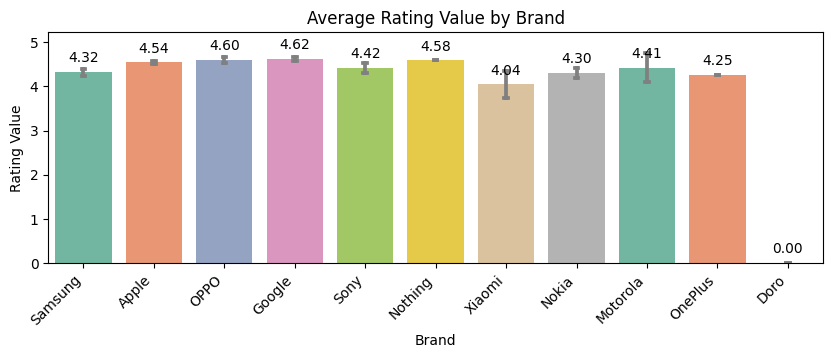

In [52]:
#
# # (3)Represent data - start to consider/show simple stories within the data
#

plot_average_rating_by_brand(phone_details_list)


In [61]:
#
# # Hypothetical db store + extract (here done only in memory as db not portable)
#

# Create a database connection
conn = sqlite3.connect(":memory:")

# Call the create_phone_details_table() function to create the phone_details table
create_phone_details_table(conn)

# Call the insert_phone_details() function to insert the extracted phone details into the phone_details table
insert_phone_details(conn, phone_details_list)



# Execute a SELECT query on the phone_details table
c = conn.cursor()
c.execute("SELECT brand, model_family, star_rating, rating_value FROM phone_details LIMIT 5")

# Fetch the results of the query and print them out
results = c.fetchall()
for row in results:
    print(row)

# Close the database connection
conn.close()

('Samsung', 'Galaxy S23 Ultra', None, '4.2941')
('Samsung', 'Galaxy S23', None, '5')
('Samsung', 'Galaxy S23 Plus', None, '5')
('Apple', 'iPhone 14', None, '4.3472')
('Apple', 'iPhone 14 Pro', None, '4.5901')
